In [1]:
"Tabular Q"
import sys
pwd = "P:/dsv/DAMII/Practical Project/rl_stock_agents"
sys.path.append(pwd)

import cleandata
import numpy as np
from stockenv import DiscretizedOHLCVEnv
import matplotlib.pyplot as plt

# Import File
import_path = "P:/dsv/DAMII/Practical Project/rl_stock_agents/input_data"
file_name = "tsla_daily.csv"
df_tsla_ohlcv = cleandata.NASDAQ_csv_input(file_name,import_path)

# Global Things
float_compare_threshold = 1e-8  ## Define a small threshold for comparison

# Generate Environment 
ohlcv_bin_sizes = [50,10,10,50,50]
StockMarket = DiscretizedOHLCVEnv(df_tsla_ohlcv[["open","high","low",'close',"volume"]].iloc[:2000].to_numpy(),ohlcv_bin_sizes )

# Defining Q-learning parameters
num_states = np.product(ohlcv_bin_sizes)     ## Number states (bins) for the stock market data
num_actions = StockMarket.action_space.n     ## Number of actions (Sell, Hold, Buy)
epsilon = 0.1       ## Eplsion-greed parameter for exploration vs. exploitation
alpha = 0.1         ## learning rate
gamma = 0.9         ## Discount factor for future rewards
num_episodes = 50 ## Initialize the number of episodes


# Setting up Q-Table
tensor_shape = np.array(ohlcv_bin_sizes + [num_actions])
Q_tensor = np.zeros(tensor_shape)

# Links between Enviorment Action and Q-Table Index
action_to_Q_idx = {-1: 0, 0: 1, 1: 2} #Sell=-1, Hold=0, Buy = 2
Q_idx_to_action = {0: -1, 1: 0, 2: 1} # Sell=-1, Hold=0, Buy = 2


# Training

In [2]:
# Q-learning algorithm
nominal_return = [] 
for episode in range(num_episodes):
    StockMarket.reset()  # Start at the initial state
    state = StockMarket.get_observation()
    
    done = False
    while not done:
   
       
        possible_actions = StockMarket.available_actions
          
        
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon: # Explore
            action = np.random.choice(possible_actions)  
            action_Q_idx = action_to_Q_idx[action]
            
                        
        else:  #Exploit
              
            possible_action_Q_idx = [action_to_Q_idx[act] for act in possible_actions] ## Available Q-indices from avaliable action list
            
            max_value = np.max(Q_tensor[state][possible_action_Q_idx]) ## Find Maximum Q-value
            
            max_indices = [i for i, q_value in enumerate(Q_tensor[state]) if abs(q_value - max_value) < float_compare_threshold] ## Find indicies with max Q-value
            
            valid_max_indices = list(set(possible_action_Q_idx).intersection(set(max_indices)))
            
            if len(max_indices) > 1:     ## If there is a tie for maximum indices                   
                action_Q_idx = np.random.choice(valid_max_indices)
                #print(f'More than one, index chosen: {action_Q_idx}')
            else:
                action_Q_idx = max_indices[0]
                #print(f'One Max Value')
            
            action = Q_idx_to_action[action_Q_idx]
                   

        #print(action)

        # Perform action and observe next state and reward
        next_observation, reward, done = StockMarket.step(action)
        
        # Update Q-value using Q-learning formula
        Q_tensor[state][action_Q_idx] += alpha * (reward + gamma * np.max(Q_tensor[next_observation]) - Q_tensor[state][action_Q_idx])
        
        # Move to the next state
        state = next_observation
        
        # Check if the episode is finished (end of data)
        if StockMarket.current_step == StockMarket.max_idx:
            done = True
    nominal_return.append(StockMarket.total_portfolio_value)


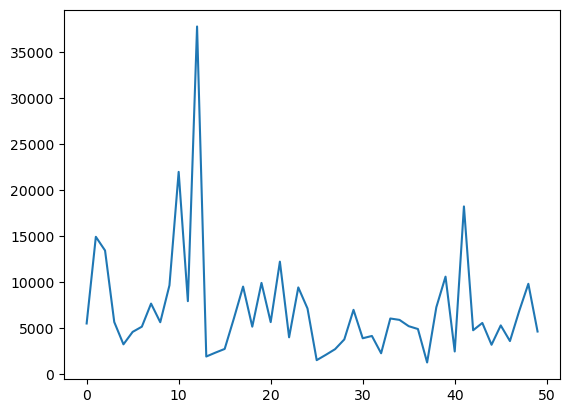

Learning Value: 80727.11711940415,216,373.73665333057477


In [3]:
t =list(range(0,num_episodes))

fig, ax = plt.subplots()

ax.plot(t,nominal_return)
plt.show()
count_zeros = np.count_nonzero(Q_tensor < 0)
print(f'Learning Value: {Q_tensor.sum()},{count_zeros},{Q_tensor.sum()/count_zeros}')

# Testing

[1, 0, -1, 1, 0, -1, 0, 1, -1, 1, 0, 0, 0, 0, -1, 1, -1, 0, 1, -1, 1, -1, 0, 1, -1, 0, 0, 0, 1, -1, 1, 0, 0, 0, -1, 1, -1, 0, 0, 0, 1, 0, 0, -1, 0, 1, 0, 0, 0, 0, -1, 0, 1, -1, 1, -1, 0, 1, -1, 1, -1, 1, 0, 0, 0, 0, 0, -1, 1, -1, 1, -1, 1, 0, -1, 1, -1, 1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, -1, 1, 0, -1, 1, -1, 1, -1, 0, 0, 0, 1, -1, 0, 0, 0, 1, -1, 0, 0, 1, -1, 0, 1, -1, 1, -1, 1, -1, 1, 0, 0, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1, 1, -1, 1, 0, 0, -1, 0, 1, 0, 0, 0, -1, 0, 1, 0, -1, 1, -1, 0, 0, 0, 0, 1, 0, 0, -1, 1, -1, 0, 1, 0, 0, -1, 1, -1, 1, -1, 1, -1, 0, 1, 0, 0, -1, 1, -1, 0, 1, 0, 0, -1, 0, 1, -1, 1, -1, 1, -1, 1, 0, 0, 0, 0, 0, -1, 1, -1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 1, 0, -1, 1, 0, 0, -1, 1, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, -1, 1, 0, -1, 0, 1, 0, 0, 0, -1, 1, -1, 1, -1, 0, 0, 1, 0, -1, 1, -1, 1, -1, 1, 0, -1, 0, 1, 0, -1, 1, 0, -1, 0, 1, -1, 1, 0, -1, 1, -1, 0, 1, 0, 0, 0, 0, -1, 1, -1, 1, 0, 0, -1, 0, 1, 0, 0, -1, 0, 0, 1, -1, 1, 0, -1, 1, -1, 0, 1, 0, 0, -1, 1, 0, -1, 0, 1, 0, 0

ValueError: operands could not be broadcast together with shapes (138,) (137,) 

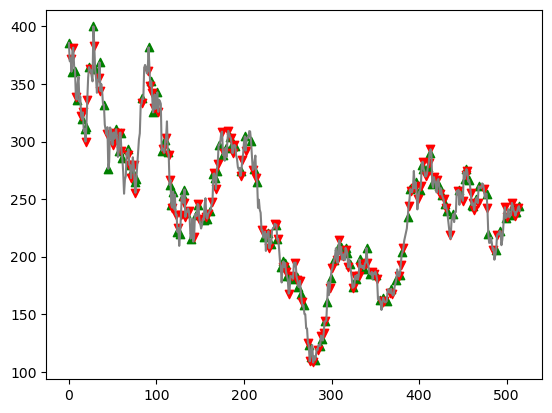

In [4]:
from agentperform import agent_stock_performance

StockMarket_test = DiscretizedOHLCVEnv(df_tsla_ohlcv[["open","high","low",'close',"volume"]].iloc[2000:].to_numpy(),ohlcv_bin_sizes )
StockMarket_test.reset()  # Start at the initial state
trades = []
nominal_return = []
state = StockMarket_test.get_observation()    
done = False
while not done:
       
    possible_actions = StockMarket_test.available_actions
          
        
    # Choose action using epsilon-greedy policy
    if np.random.rand() < epsilon: # Explore
        action = np.random.choice(possible_actions)  
        action_Q_idx = action_to_Q_idx[action]
        
                    
    else:  #Exploit
            
        possible_action_Q_idx = [action_to_Q_idx[act] for act in possible_actions] ## Available Q-indices from avaliable action list
        
        max_value = np.max(Q_tensor[state][possible_action_Q_idx]) ## Find Maximum Q-value
        
        max_indices = [i for i, q_value in enumerate(Q_tensor[state]) if abs(q_value - max_value) < float_compare_threshold] ## Find indicies with max Q-value
        
        valid_max_indices = list(set(possible_action_Q_idx).intersection(set(max_indices)))
        
        if len(max_indices) > 1:     ## If there is a tie for maximum indices                   
            action_Q_idx = np.random.choice(valid_max_indices)
            #print(f'More than one, index chosen: {action_Q_idx}')
        else:
            action_Q_idx = max_indices[0]
            #print(f'One Max Value')
        
        action = Q_idx_to_action[action_Q_idx]

    trades.append(action)            

    #print(action)

    # Perform action and observe next state and reward
    next_observation, reward, done = StockMarket_test.step(action)
    
    # Update Q-value using Q-learning formula
    Q_tensor[state][action_Q_idx] += alpha * (reward + gamma * np.max(Q_tensor[next_observation]) - Q_tensor[state][action_Q_idx])
    
    # Move to the next state
    state = next_observation
    
    # Check if the episode is finished (end of data)
    if StockMarket_test.current_step == StockMarket_test.max_idx:

        done = True
    
nominal_return.append(StockMarket_test.total_portfolio_value)
trade_seq = np.array(trades)
print(list(trade_seq))
agent_stock_performance(df_tsla_ohlcv['close'].iloc[2000:].to_numpy(),trade_seq,"TSLA","Q-Tabular")